In [53]:
import pandas as pd
import numpy as np
from datetime import datetime

In [54]:
def get_holidays(years):
    holidays = list()
    for year in years:
        holidays_wrong = pd.read_json('https://api.calendario.com.br/?json=true&ano=%s&ibge=2304400&token=bWFkc29uZGRpYXNAZ21haWwuY29tJmhhc2g9MTIzNDc0NTU0' % year).date.astype('str').values
#         holidays.extend(['%s-%s-%s' % (x.split('-')[0], x.split('-')[1], x.split('-')[2]) for x in holidays_wrong])
        holidays.extend(holidays_wrong)
    return holidays

In [58]:
path_name = '../data/climate/'
file_names_pr = ['24279', '24319', '24320', '24321']
file_names_t  = ['225', '572']

df_final = pd.DataFrame()

for file_name in file_names_pr:
    df_ = pd.read_csv(path_name+'pr/'+file_name+'.csv')
    df_final[file_name] = df_['pr']

for file_name in file_names_t:
    df_final['avg_tmp_'+file_name] = pd.read_csv(path_name+'t2m/'+file_name+'.csv')['avg_tmp']
    df_final['max_tmp_'+file_name] = pd.read_csv(path_name+'t2mmax/'+file_name+'.csv')['max_tmp']
    df_final['min_tmp_'+file_name] = pd.read_csv(path_name+'t2mmin/'+file_name+'.csv')['min_tmp']
    
df_['year']  = df_['year'].astype('object')
df_['month'] = df_['month'].astype('object')
df_['day']   = df_['day'].astype('object')

df_['dia'] = df_.apply(lambda x: '%s-%s-%s' % (x['year'], str(x['month']).zfill(2), str(x['day']).zfill(2)), axis=1)

df_final = df_final.assign(weekday=df_.apply(lambda x: datetime.strptime('%s-%s-%s' % (x['year'],x['month'],x['day']),'%Y-%m-%d').weekday(), axis=1),
                           dia=df_['dia'])

holidays_list = get_holidays(['2014','2015','2016', '2017'])
df_final = df_final.assign(holiday=df_.apply(lambda x: 1 if '%s-%s-%s' % (str(x['year']), str(x['month']).zfill(2),str(x['day']).zfill(2)) in holidays_list else 0, axis=1))
df_final = df_final.assign(workingday=df_final.apply(lambda x: 0 if x['holiday'] == 1 or x['weekday'] in [6,7] else 1, axis=1))
df_final = df_final.assign(avg_pr=df_final[file_names_pr].mean(axis=1))
df_final = df_final.assign(max_pr=df_final[file_names_pr].max(axis=1))
df_final = df_final.assign(min_pr=df_final[file_names_pr].min(axis=1))
df_final = df_final.assign(avg_tmp=df_final[['avg_tmp_225','avg_tmp_572']].mean(axis=1))
df_final = df_final.assign(min_tmp=df_final[['min_tmp_225','min_tmp_572']].mean(axis=1))
df_final = df_final.assign(max_tmp=df_final[['max_tmp_225','max_tmp_572']].mean(axis=1))
df_final = df_final.drop(['avg_tmp_225','avg_tmp_572','min_tmp_225','min_tmp_572','max_tmp_225','max_tmp_572'], axis=1)
df_final = df_final.drop(file_names_pr, axis=1)
df_final['max_pr'].value_counts()

# df_final = df_final.fillna(df_final.mean())
# df_final = df_final.interpolate()

df_final = df_final.set_index('dia')
df_final = df_final.iloc[349:]

df_viagens = pd.read_csv('../data/bicicletar/graph_datasets/rides_per_sex.csv', index_col='dia')
df_final.isna().sum()

weekday        0
holiday        0
workingday     0
avg_pr         0
max_pr         0
min_pr         0
avg_tmp       23
min_tmp       21
max_tmp       24
dtype: int64

In [21]:
pd.concat([df_viagens,df_final], axis=1).to_csv('../data/bicicletar/graph_datasets/climate_rides.csv')


/home/renan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [18]:
aa = pd.concat([df_final, df_viagens], axis=1)
aa = aa.fillna(0)
aa['date'] = aa.index
aa.to_json('/home/omadson/Downloads/sources391/data/tmp.json',orient='records')

/home/omadson/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [10]:
# aa['date'] == aa.index


In [13]:
year = 2014
holidays_wrong = pd.read_json('https://api.calendario.com.br/?json=true&ano=%s&ibge=2304400&token=bWFkc29uZGRpYXNAZ21haWwuY29tJmhhc2g9MTIzNDc0NTU0' % year).date.astype('str').values

In [19]:
aa[aa.index == '2017-12-31'][['M_0','F_0','O_0']]

,M_0,F_0,O_0
2017-12-31,234.0,111.0,0.0


In [13]:
aa[aa.index == '2015-01-01']

,weekday,holiday,workingday,avg_pr,max_pr,min_pr,avg_tmp,min_tmp,max_tmp,M_0,F_0,O_0,M_3,F_3,O_3,M_4,F_4,O_4,date
2015-01-01,3,1,0,0.0,0.0,0.0,27.3775,24.7,31.6,274.0,243.0,5.0,15.0,10.0,0.0,3.0,0.0,0.0,2015-01-01


In [29]:
year = 2015
pd.read_json('https://api.calendario.com.br/?json=true&ano=%s&ibge=2304400&token=bWFkc29uZGRpYXNAZ21haWwuY29tJmhhc2g9MTIzNDc0NTU0' % year)

,date,description,link,name,raw_description,type,type_code
0,2015-01-01,O Ano-Novo ou Réveillon é um evento que aconte...,http://www.calendario.com.br/feriados-nacionai...,Ano Novo,NaN,Feriado Nacional,1
1,2015-02-16,"Ponto Facultativo, ou seja, cabe às empresas e...",http://www.calendario.com.br/feriados-nacionai...,Carnaval,NaN,Facultativo,4
2,2015-02-17,"Carnaval NÃO é um feriado oficial, é Ponto Fac...",http://www.calendario.com.br/feriados-nacionai...,Carnaval,NaN,Facultativo,4
3,2015-02-18,Ponto Facultativo até às 14h.,http://www.calendario.com.br/feriados-nacionai...,Carnaval,NaN,Facultativo,4
4,2015-03-19,Padroeiro do Estado do Ceará,,Dia de São José,Padroeiro do Estado do Ceará,Facultativo,4
5,2015-03-19,"Dia de São José, padroeiro do estado do Ceará,...",http://216.59.16.201:8080/sapl/sapl_documento...,São José,"Dia de São José, padroeiro do estado do Ceará,...",Feriado Municipal,3
6,2015-03-25,É a data magna onde ocorrem as comemorações do...,,Data Magna do Ceará,É a data magna onde ocorrem as comemorações do...,Feriado Estadual,2
7,2015-01-04,"Dia da mentira, dia das petas, dia dos tolos o...",,Dia da Mentira,NaN,Dia Convencional,9
8,2015-03-04,"Também chamada de ""Sexta Feira da Paixão"" é a ...",http://www.calendario.com.br/feriados-nacionai...,Sexta-Feira Santa,NaN,Feriado Nacional,1
9,2015-03-04,conforme a Lei nº 8796 de 09 de dezembro de 2003,http://216.59.16.201:8080/sapl/sapl_documento...,Sexta-feira Santa,conforme a Lei nº 8796 de 09 de dezembro de 2003,Feriado Municipal,3


In [30]:
year = 2014
pd.read_json('https://api.calendario.com.br/?json=true&ano=%s&ibge=2304400&token=bWFkc29uZGRpYXNAZ21haWwuY29tJmhhc2g9MTIzNDc0NTU0' % year)

,date,description,link,name,raw_description,type,type_code
0,2014-01-01,O Ano-Novo ou Réveillon é um evento que aconte...,http://www.calendario.com.br/feriados-nacionai...,Ano Novo,NaN,Feriado Nacional,1
1,2014-03-03,"Ponto Facultativo, ou seja, cabe às empresas e...",http://www.calendario.com.br/feriados-nacionai...,Carnaval,NaN,Facultativo,4
2,2014-04-03,"Carnaval NÃO é um feriado oficial, é Ponto Fac...",http://www.calendario.com.br/feriados-nacionai...,Carnaval,NaN,Facultativo,4
3,2014-05-03,Ponto Facultativo até às 14h.,http://www.calendario.com.br/feriados-nacionai...,Carnaval,NaN,Facultativo,4
4,2014-03-19,Padroeiro do Estado do Ceará,,Dia de São José,Padroeiro do Estado do Ceará,Facultativo,4
5,2014-03-19,"Dia de São José, padroeiro do estado do Ceará,...",http://216.59.16.201:8080/sapl/sapl_documento...,São José,"Dia de São José, padroeiro do estado do Ceará,...",Feriado Municipal,3
6,2014-03-25,É a data magna onde ocorrem as comemorações do...,,Data Magna do Ceará,É a data magna onde ocorrem as comemorações do...,Feriado Estadual,2
7,2014-01-04,"Dia da mentira, dia das petas, dia dos tolos o...",,Dia da Mentira,NaN,Dia Convencional,9
8,2014-04-13,"conforme Lei nº 7535, de 16 de junho 1994",http://216.59.16.201:8080/sapl/sapl_documentos...,Aniversário de Fortaleza,"conforme Lei nº 7535, de 16 de junho 1994",Feriado Municipal,3
9,2014-04-18,"Também chamada de ""Sexta Feira da Paixão"" é a ...",http://www.calendario.com.br/feriados-nacionai...,Sexta-Feira Santa,NaN,Feriado Nacional,1


In [22]:
dataset = pd.read_csv('../data/bicicletar/graph_datasets/climate_rides.csv')

In [11]:
from seaborn import regplot

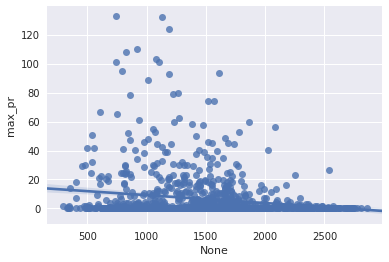

In [23]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x=(dataset['M_0']+dataset['F_0']), y=dataset['max_pr'])

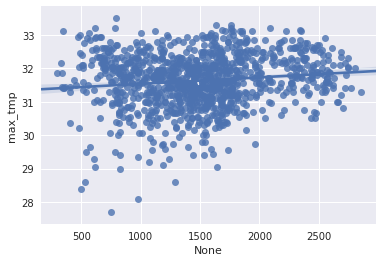

In [24]:
ax = sns.regplot(x=(dataset['M_0']+dataset['F_0']), y=dataset['max_tmp'])

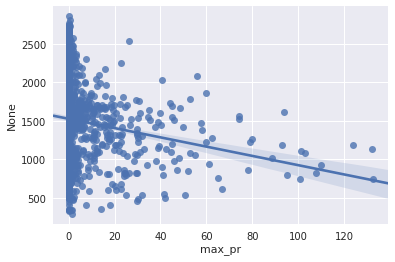

In [41]:
# filter_dataset = dataset[dataset['max_pr']>0]
filter_dataset = dataset
ax = sns.regplot(y=(filter_dataset['M_0']+filter_dataset['F_0']), x=filter_dataset['max_pr'])

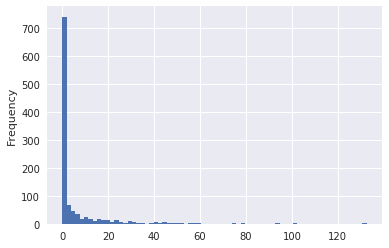

In [39]:
dataset['max_pr'].plot.hist(bins=70)

In [46]:
dataset['max_pr'].value_counts()

0.0      575
0.2       26
0.4       19
0.5       18
2.0       14
1.2       13
1.0       13
0.8       11
1.4       11
1.6       10
11.0       9
0.6        9
0.3        8
3.0        7
3.4        7
1.8        7
0.1        7
2.4        7
12.2       6
4.0        6
6.0        6
2.2        5
3.8        5
3.2        5
0.7        5
5.6        4
7.4        4
4.8        4
2.6        4
1.1        4
        ... 
25.4       1
5.7        1
11.4       1
31.2       1
9.4        1
52.8       1
41.4       1
3.1        1
10.2       1
28.4       1
42.4       1
13.8       1
19.6       1
12.6       1
14.2       1
32.4       1
51.9       1
18.8       1
17.4       1
23.4       1
25.2       1
26.4       1
11.8       1
19.4       1
78.8       1
123.8      1
44.8       1
7.8        1
62.6       1
15.6       1
Name: max_pr, Length: 216, dtype: int64